# Order Parameter and exponent $\beta$

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import glob
import scipy.stats as stats
import pandas as pd

In [2]:
sns.set()

In [3]:
data_root = '../data/entropy-order-convolved/'
fig_root="../figures/"
# os.listdir(data_root)

In [89]:
M=8
m=10
classname="BA_NetworkPercolationExplosive_v7"
signature="{}_N_*_m_10_M_{}_entropy-order_*fast.txt".format(classname,M)

In [90]:
files=glob.glob(data_root + signature)

In [91]:
signature

'BA_NetworkPercolationExplosive_v7_N_*_m_10_M_8_entropy-order_*fast.txt'

In [92]:
files

['../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_400000_m_10_M_8_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_800000_m_10_M_8_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1000000_m_10_M_8_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_600000_m_10_M_8_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1200000_m_10_M_8_entropy-order_2019_avg.txt_convoluted_1times_fast.txt']

In [93]:
# create a file with exponent data on it and load it from there
# M=2
tc = 0.72775

### checking ensemble size

In [94]:
print("Ensemble sizes")
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        print("N=", head['N'], "  En=", head['En'])

Ensemble sizes
N= 400000   En= 20000
N= 800000   En= 20000
N= 1000000   En= 20000
N= 600000   En= 20000
N= 1200000   En= 20000


In [95]:
def find_specific_heat(t, H, N):
#     C = -t[1:]*np.diff(H)/np.diff(t)  # noisy data
    C = -t[1:]*np.diff(H)*N
#     print(1/np.diff(t)[0])
#     print(N)
    return C

def find_susceptibility(t, P, N):
    sus=np.diff(P)*N
    return sus

In [96]:
min_limit=0.98
max_limit=1.0

In [97]:
data=dict()
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        N=int(head['N'])
        M=int(head['M'])
        m=int(head['m'])
    X = np.loadtxt(file)
    t=X[:,0]
    index=(t > min_limit) & (t < max_limit)
    data[N] = X[index]
    

(7999, 3)
(11999, 3)
(15999, 3)
(19999, 3)
(23999, 3)


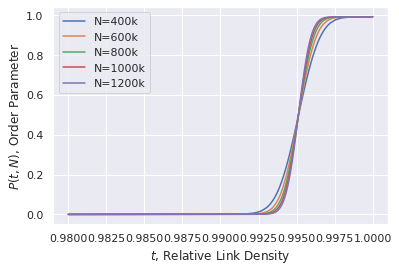

In [98]:
Ns = list(data.keys())
Ns.sort()
for N in Ns:
    print(data[N].shape)
    t, H, P = data[N].T
    plt.plot(t, P, label='N={}k'.format(N//1000))
    pass
plt.legend()
plt.xlabel(r"$t$, Relative Link Density")
plt.ylabel(r"$P(t, N)$, Order Parameter")

# plt.xlim([0.723, 0.734])
# plt.ylim([0, 0.5])
filename=fig_root + classname + "order-parameter_m{}_M{}".format(m, M)
# plt.savefig(filename)

## Finding $1/\nu$

(7999, 3)
(11999, 3)
(15999, 3)
(19999, 3)
(23999, 3)


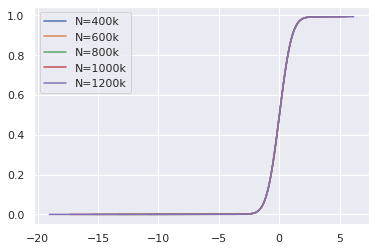

In [100]:

tc = 0.9951049405863498
one_by_nu=0.51

Ns = list(data.keys())
Ns.sort()
for N in Ns:
    print(data[N].shape)
    t, H, P = data[N].T
    x = (t-tc)*N**(one_by_nu)
    plt.plot(x, P, label='N={}k'.format(N//1000))
    pass
plt.legend()
# plt.xlabel(r"$t$, Relative Link Density")
# plt.ylabel(r"$P(t, N)$, Order Parameter")

# plt.xlim([-100, 100])
# plt.ylim([0, 0.5])
filename=fig_root + classname + "order-parameter_m{}_M{}".format(m, M)
# plt.savefig(filename)

### finding $1/\nu$

In [124]:
h=0.98

[7047]
[13508]
[16699]
[10296]
[19872]


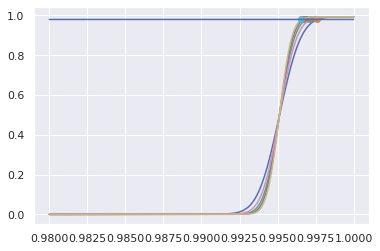

In [125]:
intersection_x = [] # x value at intersections
#     fig = plt.figure(figsize=(5,5), dpi=300)
for N in data.keys():
    t, H, P = data[N].T
    y = P
    y_h = np.ones(t.shape[0])*h
#     t_prime = (t-tc)*N**(one_by_nu)
    idx = np.argwhere(np.diff(np.sign(y_h - y))).flatten()
    
    print(idx)
    plt.plot(t, y, label='N={}'.format(N))
#     plt.plot(t, y_h)
    plt.plot(t[idx], y_h[idx], 'o')

    intersection_x.append([N, t[idx][0], P[idx][0]])
    pass
plt.plot(t, y_h)
# plt.xlim([0.72, 0.74])
# plt.ylim([0, 0.5])

In [126]:
intersection_x = np.array(intersection_x)
tc = 0.9951049405863498
tc = 0.9951885920490218
tc = 0.9951985920490225

In [127]:
intersection_x[:,1] = np.abs(intersection_x[:,1]-tc)

LinregressResult(slope=-0.5233953305075367, intercept=0.7291323131837535, rvalue=-0.9999871786885582, pvalue=5.5110163156740976e-08, stderr=0.0015302226122438116)


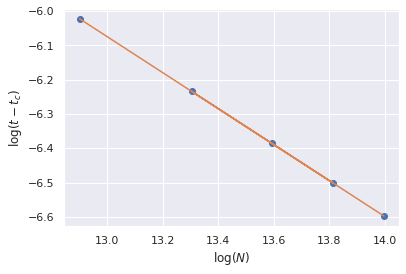

In [128]:
log_data = np.log(intersection_x)
plt.plot(log_data[:,0], log_data[:,1], 'o')
regress = stats.linregress(log_data[:,0], log_data[:,1])
y = regress[0]*log_data[:,0] + regress[1]
plt.plot(log_data[:,0], y)
plt.xlabel(r"$\log(N)$")
plt.ylabel(r"$\log(t-t_c)$")
print(regress)

In [129]:
one_by_nu

0.51

In [21]:
one_by_nu = abs(regress[0])

In [37]:
tc = 0.9914339600114201

(-10, 10)

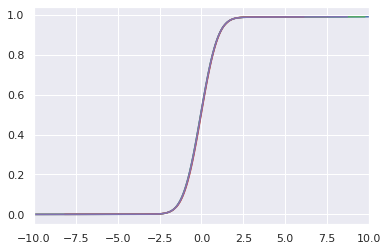

In [38]:
#     fig = plt.figure(figsize=(5,5), dpi=300)
for N in data.keys():
    t, H, P = data[N].T
    t_prime = (t-tc)*N**(one_by_nu)
    y = P

    plt.plot(t_prime, y, label='N={}'.format(N))

    pass

plt.xlim([-10,10])
# plt.ylim([0, 0.5])

selected point  (2.8992911818423113, 0.9933819417)
selected point  (2.8981305357480944, 0.9931458171)
selected point  (2.8995562846719007, 0.9930812304)
selected point  (2.8990460159540152, 0.9932383823)
selected point  (2.8998534110168834, 0.9930309998)
x=  2.9  beta/nu= -0.0003220786211391154  stderr= 9.634332757604243e-06


(0, 1.3)

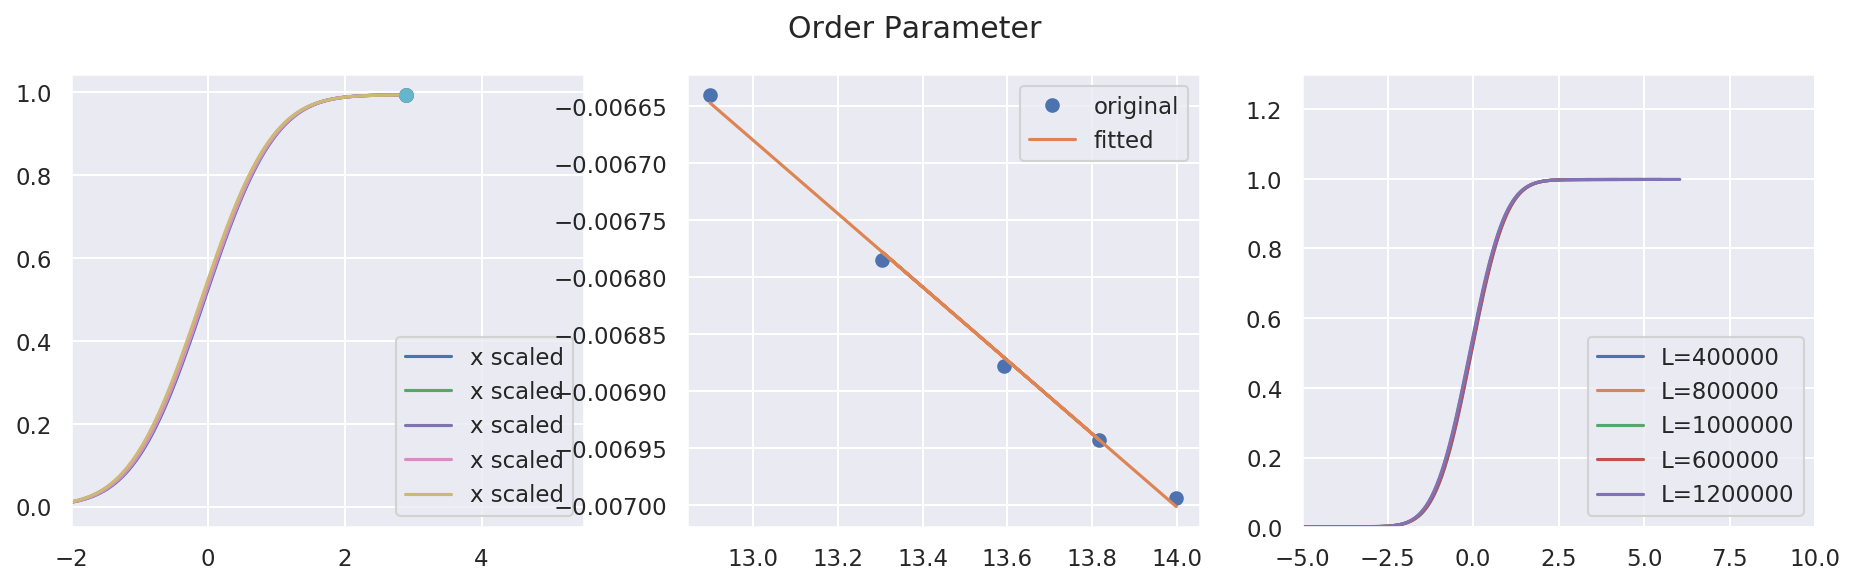

In [133]:
x_dist = 2.9

fig, ax = plt.subplots(1, 3, figsize=(15, 4), dpi=150)
length_height=[]
for N in data.keys():
    t, H, P = data[N].T
    y = P
    x = (t-tc)*N**(one_by_nu)
    index = x < x_dist
    y = P
    ax[0].plot(x[index], y[index], label="x scaled".format(N))
    selected = (x[index][-1], y[index][-1])
    print("selected point ", selected)
    ax[0].plot(selected[0], selected[1], 'o')
    length_height.append([])
    length_height[-1].append(N)
    length_height[-1].append(selected[1])
    pass

length_height = np.log(length_height)
ax[1].plot(length_height[:,0], length_height[:,1], 'o', label='original')

regress = stats.linregress(length_height[:,0], length_height[:,1])
exponent_beta = regress[0]
error = regress[-1]
print("x= ", x_dist, " beta/nu=", exponent_beta, " stderr=", error)

ax[1].plot(length_height[:,0], length_height[:,0]*regress[0]+regress[1], label='fitted')
# ax[1].text(2,2, "x={}, beta={:.4f}, error={:.4f}".format(x_dist, exponent_beta, error))



for N in data.keys():
    t, H, P = data[N].T

    x = (t-tc)*N**(one_by_nu)
    y = P
    
    index = np.linspace(0, x.shape[0]-5, 1000, dtype=int)
    y = P*N**(-regress[0])
    ax[2].plot(x[index], y[index], label="L={}".format(N))
    
    pass


# plt.legend()
fig.suptitle("Order Parameter")
ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_xlim([-2, 5.5])
# ax[1].set_xlim([-5, 5])
ax[2].set_xlim([-5, 10])

ax[2].set_ylim([0, 1.3])

In [28]:
0.0010973409840844652

0.0010973409840844652

In [ ]:
0.001232344143001734

### Data Collapse

read from a file so that I don't have to type it in everytime

In [137]:
filename = "BA_explosive_exponents"
df = pd.read_csv(filename)
df.index = df['M']

tc = df['tc'][M]
one_by_nu = df['one_by_nu'][M]
beta_by_nu = df['beta_by_nu'][M]

print(M)
print(tc)
print(one_by_nu)
print(beta_by_nu)
# print(df)

8
0.9951985920490224
0.5233953305075367
0.0003220786211391154


(7999, 3)
(11999, 3)
(15999, 3)
(19999, 3)
(23999, 3)


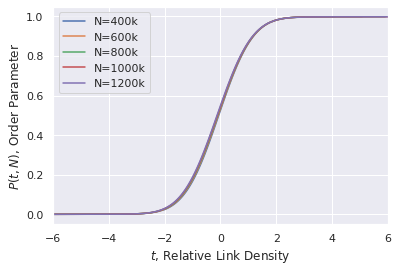

In [138]:
Ns = list(data.keys())
# beta_by_nu += 0.005
# beta_by_nu=0.06224871531346351

Ns.sort()
for N in Ns:
    print(data[N].shape)
    t, H, P = data[N].T
    x = (t-tc)*N**(one_by_nu)
    y = P*N**(beta_by_nu)
    plt.plot(x, y, label='N={}k'.format(N//1000))
    pass
plt.legend()
plt.xlabel(r"$t$, Relative Link Density")
plt.ylabel(r"$P(t, N)$, Order Parameter")

plt.xlim([-6, 6])
# plt.ylim([0, 0.5])
filename=fig_root + classname + "order-parameter_collapse_m{}_M{}".format(m, M)
# plt.savefig(filename)

In [136]:
beta_by_nu

0.0003220786211391154

In [40]:
beta_by_nu

0.06024871531346353

In [43]:
beta_by_nu

0.047248715313463516

In [47]:
beta_by_nu

0.06224871531346351